Data Sources

https://www.kaggle.com/datasets/allanwandia/world-happiness

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataframe = pd.read_csv('/content/Cleaned Dataset - Master Sheet.csv')
dataframe.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1              7.6   
1      Iceland  Western Europe               2              7.6   
2      Denmark  Western Europe               3              7.5   
3       Norway  Western Europe               4              7.5   
4       Canada   North America               5              7.4   

   Economy (GDP per Capita)   Family  Health (Life Expectancy) Freedom  \
0                    $ 1.40        1                      0.94     67%   
1                    $ 1.30        1                      0.95     63%   
2                    $ 1.33        1                      0.87     65%   
3                    $ 1.46        1                      0.89     67%   
4                    $ 1.33        1                      0.91     63%   

  Trust (Government Corruption) Generosity Dystopia Residual  \
0                           42%        30%               30%   
1                           14%        44%               30%   
2                           48%        34%               30%   
3                           37%        35%               30%   
4                           33%        46%               30%   

   Lower Confidence Interval  Upper Confidence Interval  Whisker.high  \
0                        7.5                        7.6           7.6   
1                        7.4                        7.6           7.6   
2                        7.3                        7.7           7.6   
3                        7.4                        7.6           7.6   
4                        7.4                        7.5           7.5   

   Whisker.low  
0          7.5  
1          7.5  
2          7.4  
3          7.4  
4          7.4

In [ ]:
df = pd.read_csv('/content/Cleaned Dataset - Master Sheet.csv', converters={"Freedom": lambda val: float(val.rstrip("%")) / 100,
                                                                            "Trust (Government Corruption)": lambda val: float(val.rstrip("%")) / 100,
                                                                            "Dystopia Residual": lambda val: float(val.rstrip("%")) / 100,
                                                                            "Generosity": lambda val: float(val.rstrip("%")) / 100})

dollar_cols = [col for col in df.columns if df[col].dtype == 'object' and '$' in df[col].iloc[0]]
for col in dollar_cols:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)

df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1              7.6   
1      Iceland  Western Europe               2              7.6   
2      Denmark  Western Europe               3              7.5   
3       Norway  Western Europe               4              7.5   
4       Canada   North America               5              7.4   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                        1.40       1                      0.94     0.67   
1                        1.30       1                      0.95     0.63   
2                        1.33       1                      0.87     0.65   
3                        1.46       1                      0.89     0.67   
4                        1.33       1                      0.91     0.63   

   Trust (Government Corruption)  Generosity  Dystopia Residual  \
0                           0.42        0.30                0.3   
1                           0.14        0.44                0.3   
2                           0.48        0.34                0.3   
3                           0.37        0.35                0.3   
4                           0.33        0.46                0.3   

   Lower Confidence Interval  Upper Confidence Interval  Whisker.high  \
0                        7.5                        7.6           7.6   
1                        7.4                        7.6           7.6   
2                        7.3                        7.7           7.6   
3                        7.4                        7.6           7.6   
4                        7.4                        7.5           7.5   

   Whisker.low  
0          7.5  
1          7.5  
2          7.4  
3          7.4  
4          7.4

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4    Economy (GDP per Capita)      158 non-null    object 
 5   Family                         158 non-null    int64  
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    object 
 8   Trust (Government Corruption)  158 non-null    object 
 9   Generosity                     158 non-null    object 
 10  Dystopia Residual              158 non-null    object 
 11  Lower Confidence Interval      158 non-null    float64
 12  Upper Confidence Interval      158 non-null    flo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4    Economy (GDP per Capita)      158 non-null    float64
 5   Family                         158 non-null    int64  
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Lower Confidence Interval      158 non-null    float64
 12  Upper Confidence Interval      158 non-null    flo

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
 Economy (GDP per Capita)        0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
Whisker.high                     0
Whisker.low                      0
dtype: int64

the data is clean there is no missing values

[Text(5, 0, '21'),
 Text(5, 0, '2'),
 Text(5, 0, '2'),
 Text(5, 0, '20'),
 Text(5, 0, '21'),
 Text(5, 0, '9'),
 Text(5, 0, '29'),
 Text(5, 0, '6'),
 Text(5, 0, '41'),
 Text(5, 0, '7')]

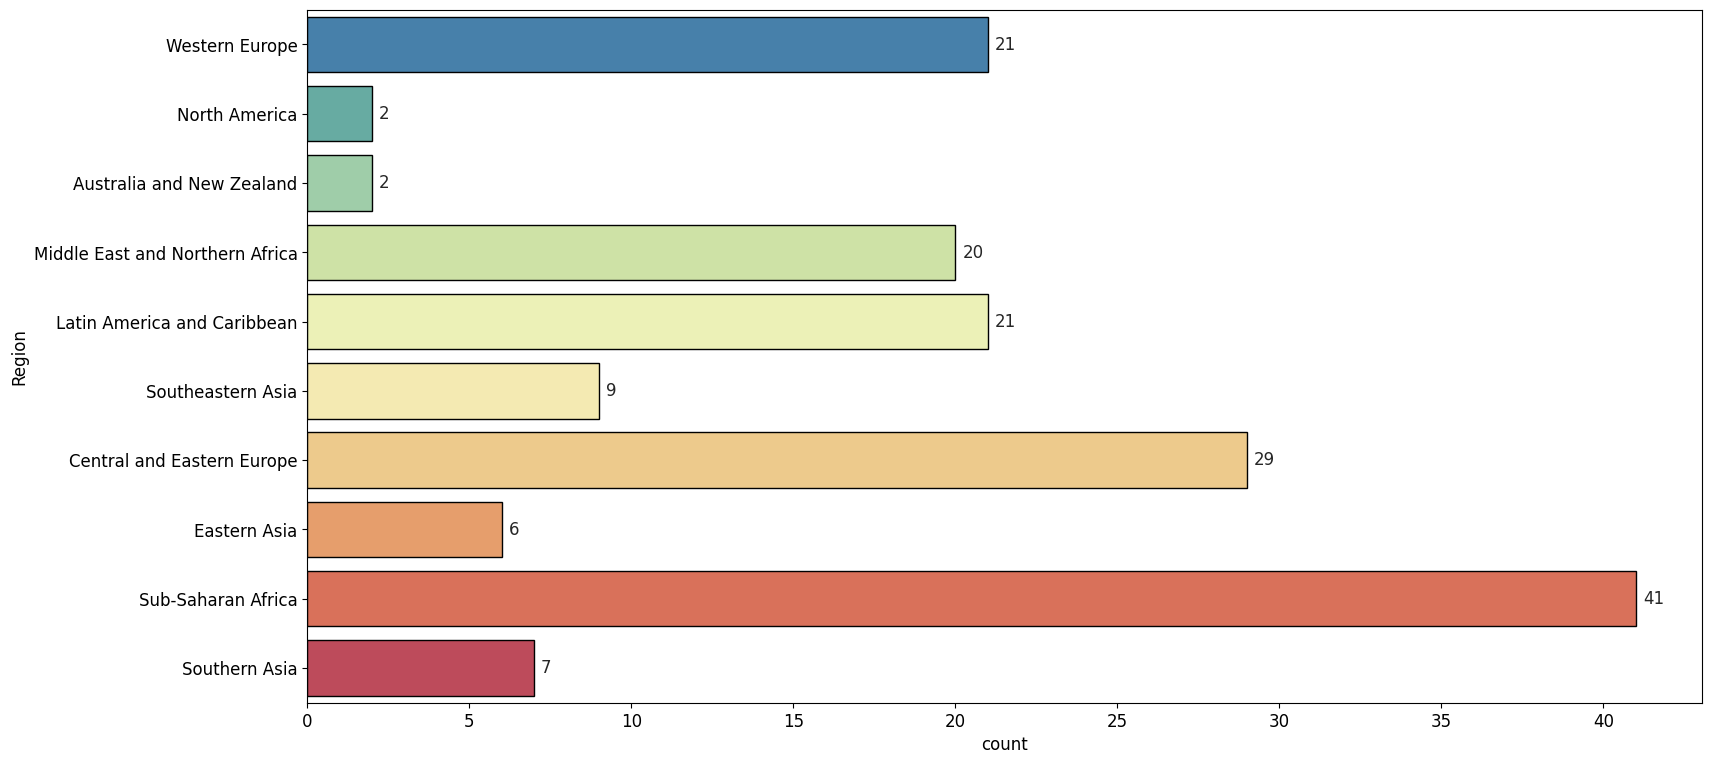

In [ ]:
plt.figure(figsize = (18,9))
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.ylabel('Region', size = 12)
plt.xlabel('count',size = 12)

sns.set(font_scale = 1)
bar = sns.countplot(data = df, y='Region', palette = "Spectral_r", edgecolor = 'black')
bar.bar_label(bar.containers[0], size = 12, padding=5)

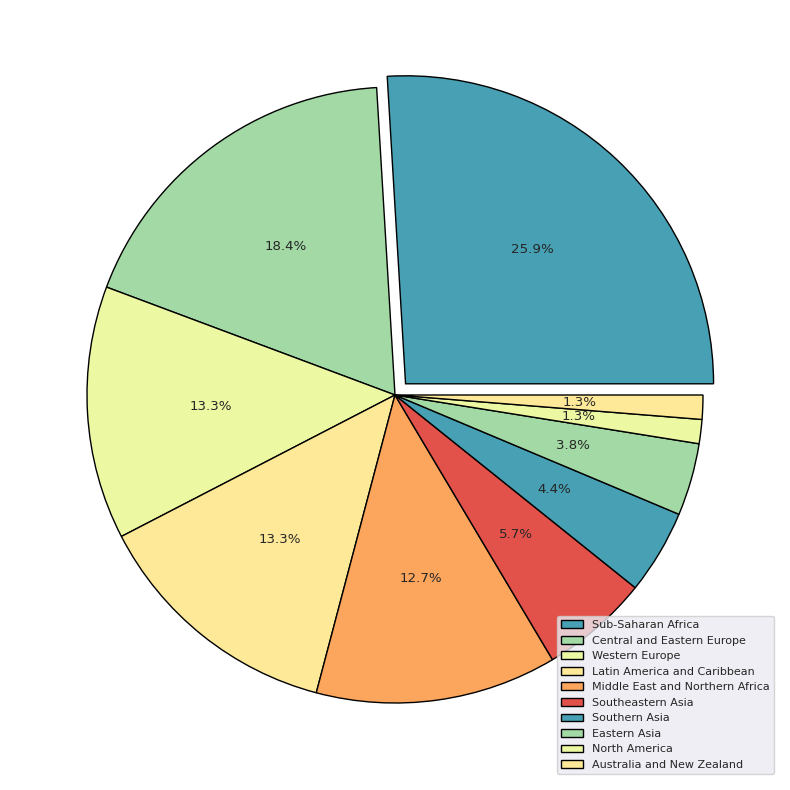

In [ ]:
labels = df["Region"].value_counts().index
sizes = df["Region"].value_counts()
explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sns.set(font_scale = 0.8)
plt.figure(figsize = (10,10))
plt.pie(sizes, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, 
        autopct='%1.1f%%',
        colors=sns.color_palette('Spectral_r'), 
        explode = explode)
plt.legend(labels, loc='lower right', fontsize=8)

plt.show()  

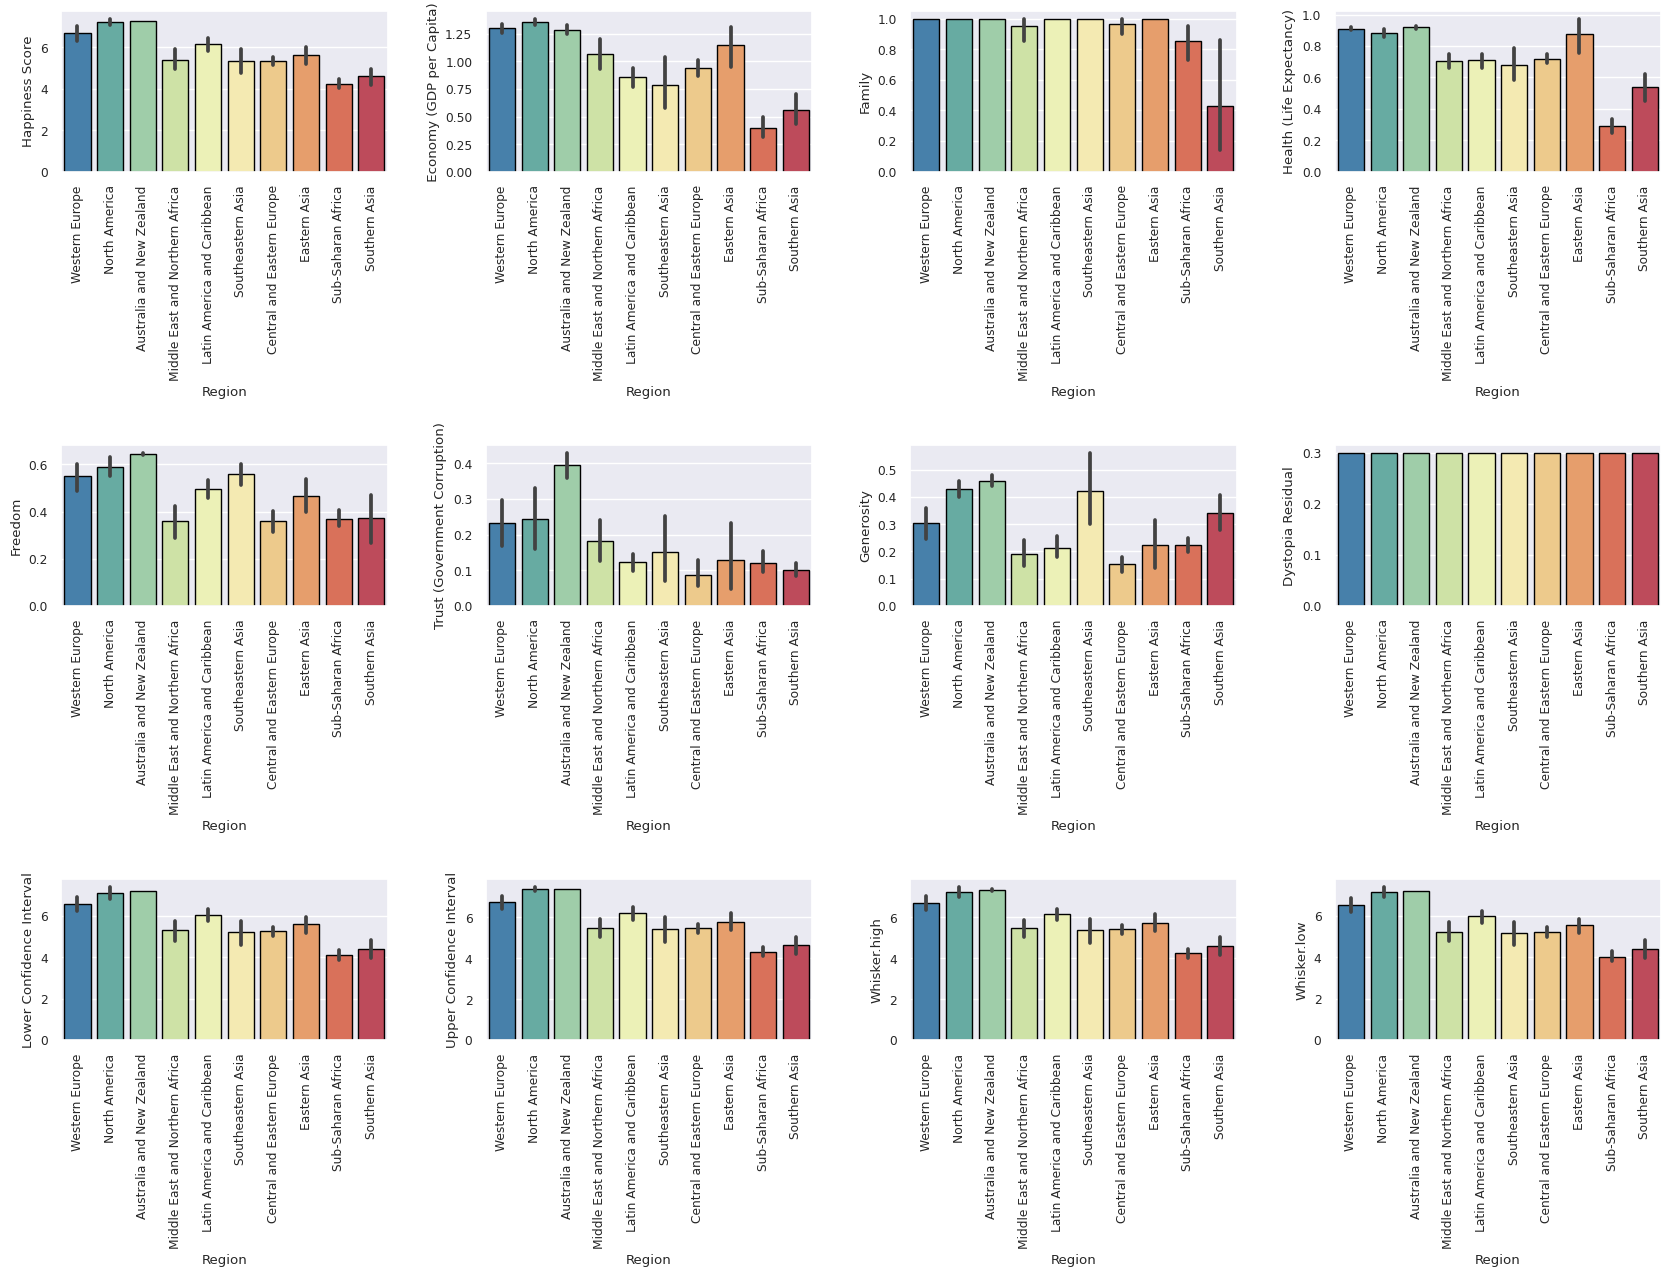

In [ ]:
df.columns
kolom = ['Happiness Score',
       ' Economy (GDP per Capita) ', 'Family', 'Health (Life Expectancy)',
       'Freedom','Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual' , 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker.high', 'Whisker.low']

list(enumerate(kolom))

plt.figure(figsize = (20 ,40))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=1.7)


for i in enumerate(kolom):
  plt.subplot(8, 4 , i[0] + 1)
  sns.barplot(data = df ,x = 'Region', y = i[1], palette = "Spectral_r", edgecolor = 'black' )
  plt.xticks(rotation = 90)

<ipython-input-13-d477a8c3ebad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


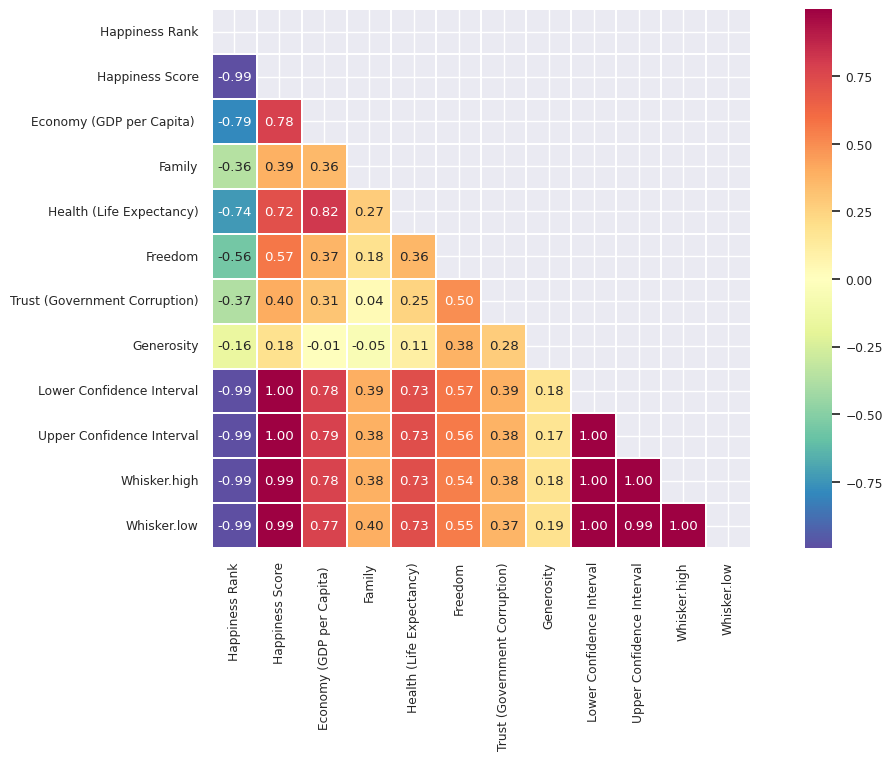

In [ ]:
fig,ax=plt.subplots(figsize=(14, 7))
#df.pop("Dystopia Residual")
data = df.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(data)] = True
sns.heatmap(data,
            annot=True,
            cmap="Spectral_r",
            center = 0,
            fmt = '.2f',
            square = True,
            linewidth = .3,
            mask = mask)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


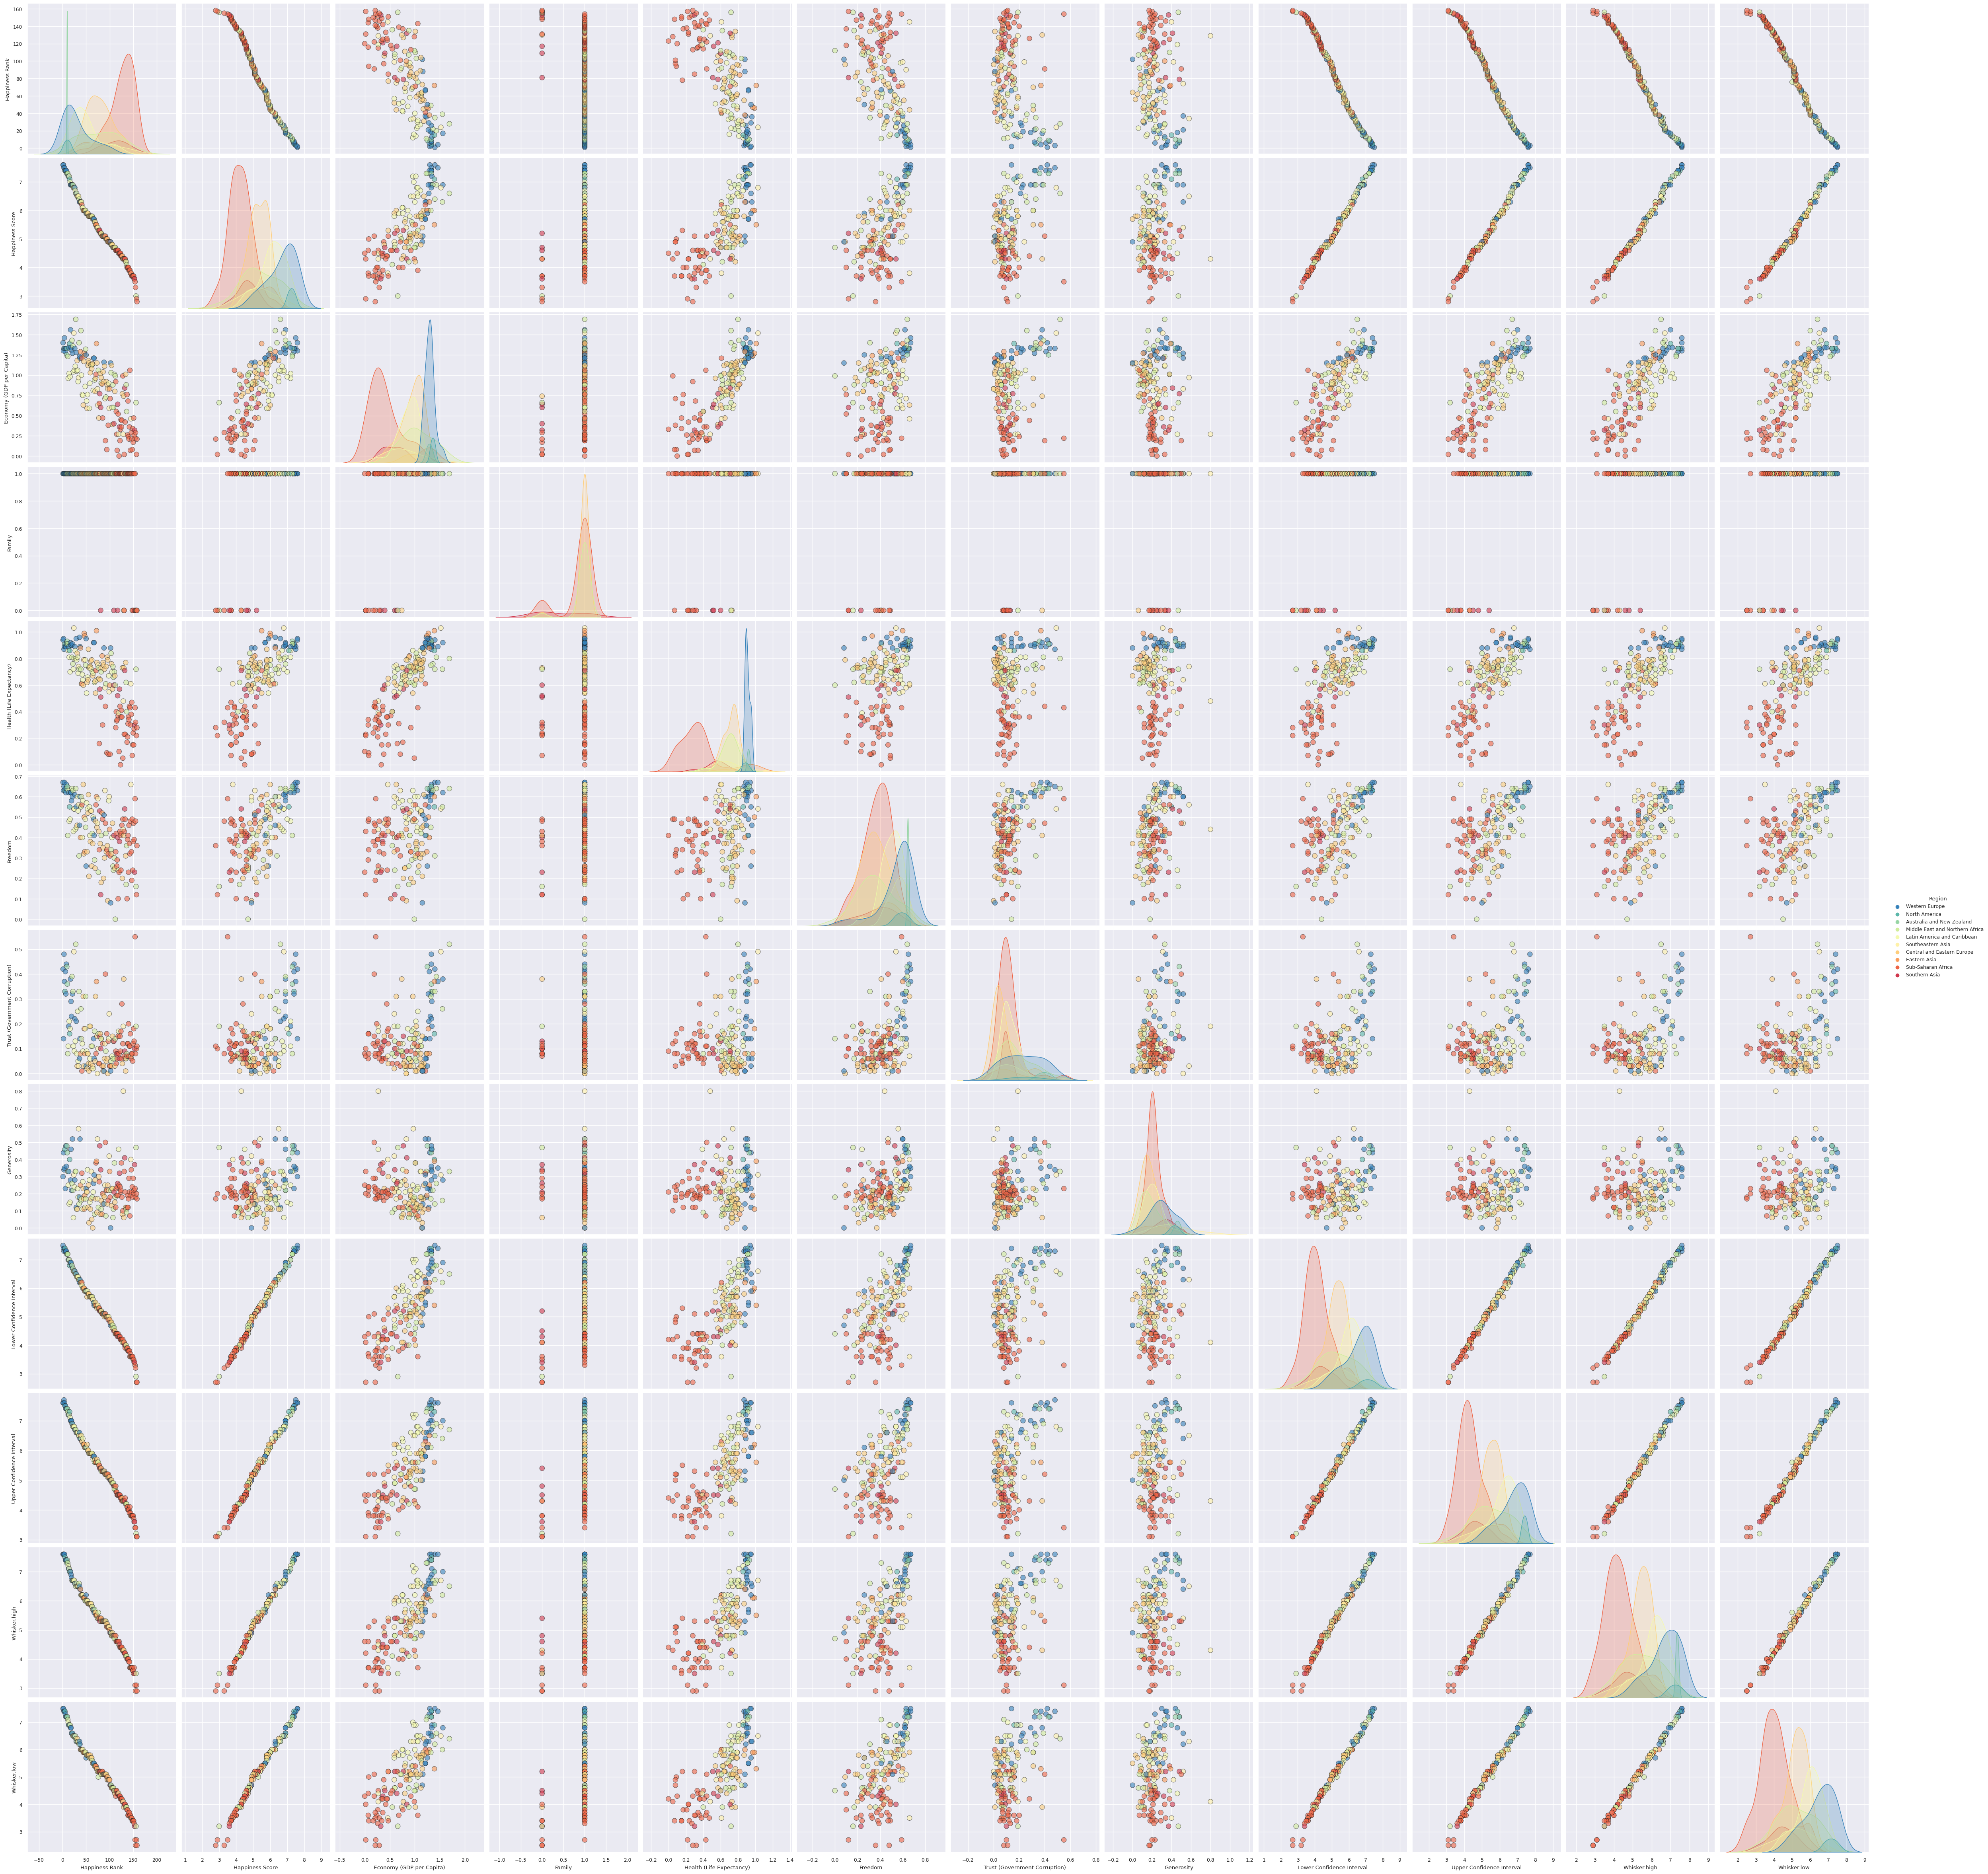

In [ ]:
sns.pairplot(df,
             hue = 'Region',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4,
             palette='Spectral_r')


In [ ]:
df2 = df[['Happiness Rank',' Economy (GDP per Capita) ', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
df2.head()

Happiness Rank   Economy (GDP per Capita)   Family  \
0               1                        1.40       1   
1               2                        1.30       1   
2               3                        1.33       1   
3               4                        1.46       1   
4               5                        1.33       1   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                      0.94     0.67                           0.42   
1                      0.95     0.63                           0.14   
2                      0.87     0.65                           0.48   
3                      0.89     0.67                           0.37   
4                      0.91     0.63                           0.33   

   Generosity  Dystopia Residual  
0        0.30                0.3  
1        0.44                0.3  
2        0.34                0.3  
3        0.35                0.3  
4        0.46                0.3

In [ ]:
x = df2.drop(columns='Happiness Rank')
y = df2['Happiness Rank']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(linreg.coef_)
print(linreg.intercept_)

[-51.43957075 -13.79060883 -40.97654087 -83.04481982  -1.00056518
 -16.68976345  66.51835354]
183.18322608145525


In [ ]:
linreg.score(x_test, y_test)

0.661425394088281

In [ ]:
linreg.predict([[1.3,1,0.98,0.55,0.25,0.35,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.55346189])